# Nachbarschaftsdefinitionen
In pyclesperanto werden Nachbarschafts-Adjazenzgraphen verwendet, um Beziehungen zwischen benachbarten gekennzeichneten Objekten, wie beispielsweise Zellen, zu untersuchen. Dieses Notebook demonstriert die betrachteten Nachbarschaftsdefinitionen.

Siehe auch
* [Bildverarbeitungsfilter für Zellgitter analog zu Filtern zur Verarbeitung von Pixelgittern](https://www.frontiersin.org/articles/10.3389/fcomp.2021.774396/full)

In [2]:
import pyclesperanto_prototype as cle
import numpy as np
import matplotlib
from numpy.random import random

cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

Zur Visualisierung der Beziehungen zwischen benachbarten Objekten beginnen wir mit einem künstlichen Zellgitter. Die Zellen sind annähernd in einem Wabengitter angeordnet. Die Intensität in diesen Zellen ist gleichmäßig verteilt. Nur eine einzige Zelle in der Mitte des Gitters hat eine viel höhere Intensität.

In [3]:
# Generate artificial cells as test data
tissue = cle.artificial_tissue_2d()

# fill it with random measurements
values = random([int(cle.maximum_of_all_pixels(tissue))])
for i, y in enumerate(values):
    if (i != 95):
        values[i] = values[i] * 10 + 45
    else:
        values[i] = values[i] * 10 + 90

measurements = cle.push(np.asarray([values]))

# visualize measurments in space
example_image = cle.replace_intensities(tissue, measurements)

## Beispieldaten
Schauen wir uns ein Bild mit beliebig geformten Pixeln an. Nennen wir sie "Zellen". In unserem Beispielbild gibt es eine Zelle in der Mitte mit höherer Intensität:

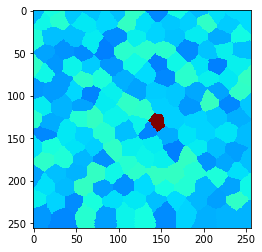

In [4]:
cle.imshow(example_image, min_display_intensity=30, max_display_intensity=90, color_map='jet')

## Berührende Nachbarn
Wir können alle Zellen anzeigen, die zur "berührenden" Nachbarschaft gehören, indem wir den Graph der berührenden Nachbarn als Netz visualisieren.

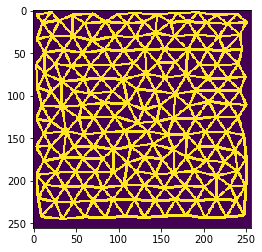

In [6]:
mesh = cle.draw_mesh_between_touching_labels(tissue)

# make lines a bit thicker for visualization purposes
mesh = cle.maximum_sphere(mesh, radius_x=1, radius_y=1)

cle.imshow(mesh)

Wenn wir einen lokalen Maximalfilter auf dieses Gitter anwenden, können wir sehen, wie sich die hohe Intensität der einzelnen Zelle in der Mitte auf direkt berührende Nachbarzellen ausbreitet.

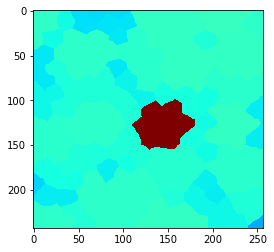

In [5]:
local_maximum = cle.maximum_of_touching_neighbors_map(example_image, tissue)

cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

## Nachbarn von berührenden Nachbarn
Sie können die Nachbarschaft auch erweitern, indem Sie Nachbarn von Nachbarn (von Nachbarn (von Nachbarn)) berücksichtigen. Wie weit Sie gehen, kann mit einem Radius-Parameter konfiguriert werden.

* Radius==0 bedeutet, es werden keine Nachbarn berücksichtigt,
* Radius==1 ist identisch mit berührenden Nachbarn,
* Radius > 1 sind Nachbarn von Nachbarn.

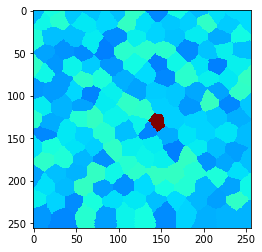

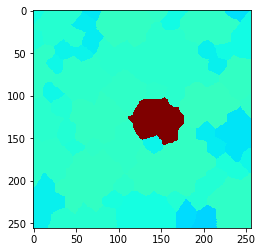

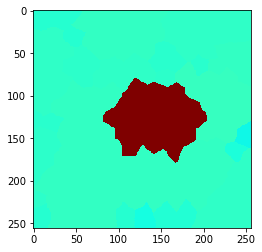

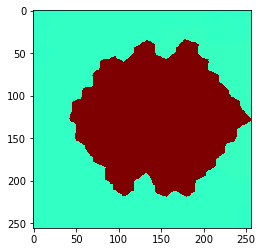

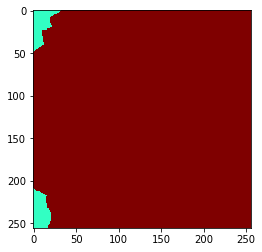

In [7]:
for radius in range(0, 5):
    local_maximum = cle.maximum_of_touching_neighbors_map(example_image, tissue, radius=radius)
    cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

## N nächste Nachbarn
Sie können auch eine Nachbarschaft aus den Abständen zwischen Zellen definieren. Als Abstandsmaß verwenden wir den euklidischen Abstand zwischen Labelschwerpunkten. Auch in diesem Fall können Sie konfigurieren, wie weit die Nachbarschaft reichen soll, indem Sie die Anzahl der nächsten Nachbarn _n_ festlegen. Wie oben erwähnt, schließen Nachbarschaften die Zentralzelle ein. Daher enthält die Nachbarschaft eines Objekts und seines `n=1` nächsten Nachbarn zwei Nachbarn.

n =  1


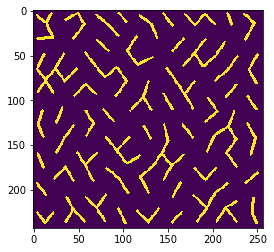

n =  2


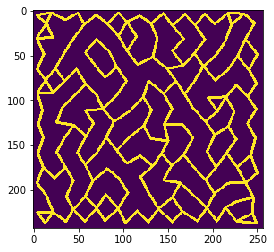

n =  3


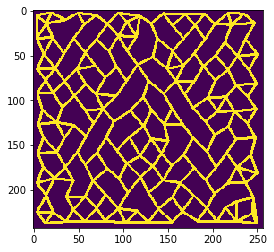

n =  4


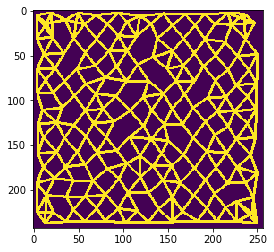

n =  5


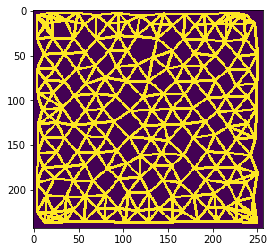

n =  6


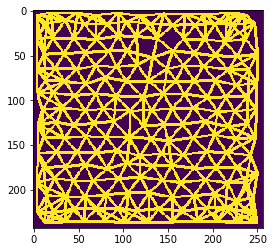

n =  7


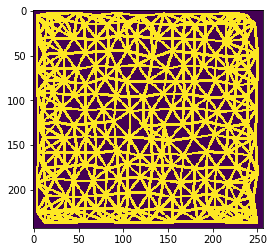

n =  8


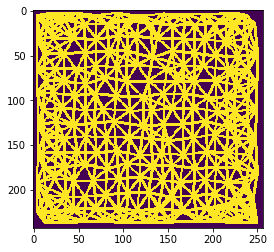

n =  9


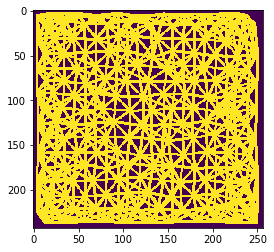

In [7]:
for n in range(1, 10):
    print("n = ", n)
    mesh = cle.draw_mesh_between_n_closest_labels(tissue, n=n)

    # make lines a bit thicker for visualization purposes
    mesh = cle.maximum_sphere(mesh, radius_x=1, radius_y=1)

    cle.imshow(mesh)

Dies kann auch mit dem lokalen Maximalfilter visualisiert werden. Im Vergleich zu Nachbarn-von-Nachbarn kann der Radius der Nachbarschaft mit n-nächsten Nachbarn feiner abgestimmt werden. Beachten Sie, dass bei der Berechnung des Maximums in dieser Nachbarschaft nicht jede Erhöhung um `n += 1` die Größe des roten Bereichs vergrößert. Dies liegt daran, dass nicht das maximale Pixel seine Intensität zu den Nachbarn schiebt, sondern die Nachbarn diese Intensität ziehen, wenn der Maximalfilter angewendet wird.

n =  1


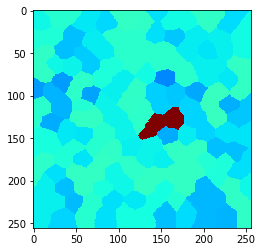

n =  2


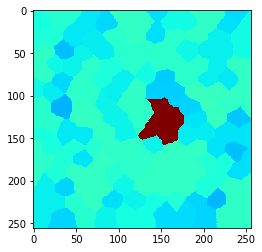

n =  3


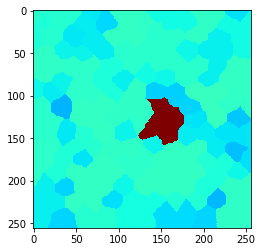

n =  4


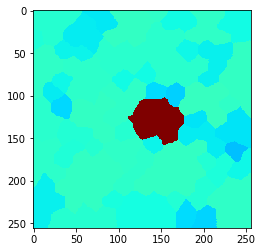

n =  5


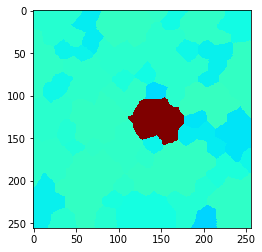

n =  6


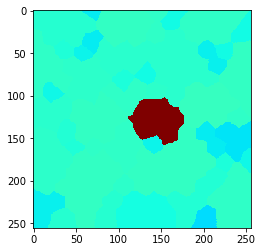

n =  7


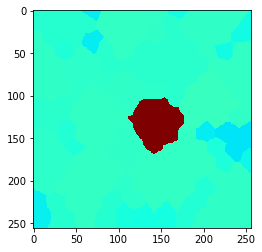

n =  8


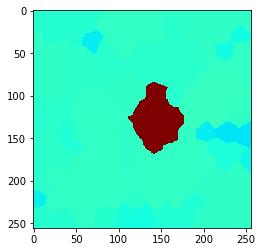

n =  9


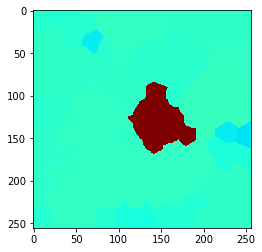

In [9]:
for n in range(1, 10):
    print("n = ", n)

    local_maximum = cle.maximum_of_n_nearest_neighbors_map(example_image, tissue, n=n)
    cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

## Proximale Nachbarn
Wir können auch das lokale Maximum von Zellen berechnen, deren Schwerpunktabstände unter einem gegebenen oberen Schwellenwert liegen.

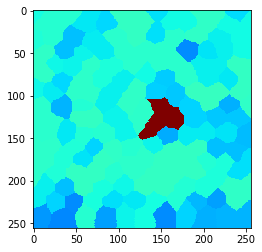

In [10]:
local_maximum = cle.maximum_of_proximal_neighbors_map(example_image, tissue, max_distance=20)
cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

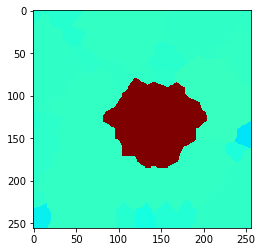

In [11]:
local_maximum = cle.maximum_of_proximal_neighbors_map(example_image, tissue, max_distance=50)
cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

# Übung
Zeichnen Sie ein Netz zwischen proximalen Nachbarn mit verschiedenen Abständen, z.B. in einer Schleife.